<a href="https://colab.research.google.com/github/muhammadyahiya/Real-Estate-Pricing/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#supress warning

import warnings
warnings.filterwarnings("ignore")

In [3]:
#save file path
real_estate_file_path = '/content/drive/My Drive/Colab Notebooks/Real estate.csv'
#read data and store data
real_estate = pd.read_csv(real_estate_file_path)
#summary of real_estate data
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#inspect various aspect of dataframe

real_estate.shape

(414, 8)

In [5]:
real_estate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
#to check the null values
real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
#describe the data
real_estate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
#check dataset after dropping 'No' col
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# **Data Visualization¶**

In [9]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns


<Figure size 432x864 with 0 Axes>

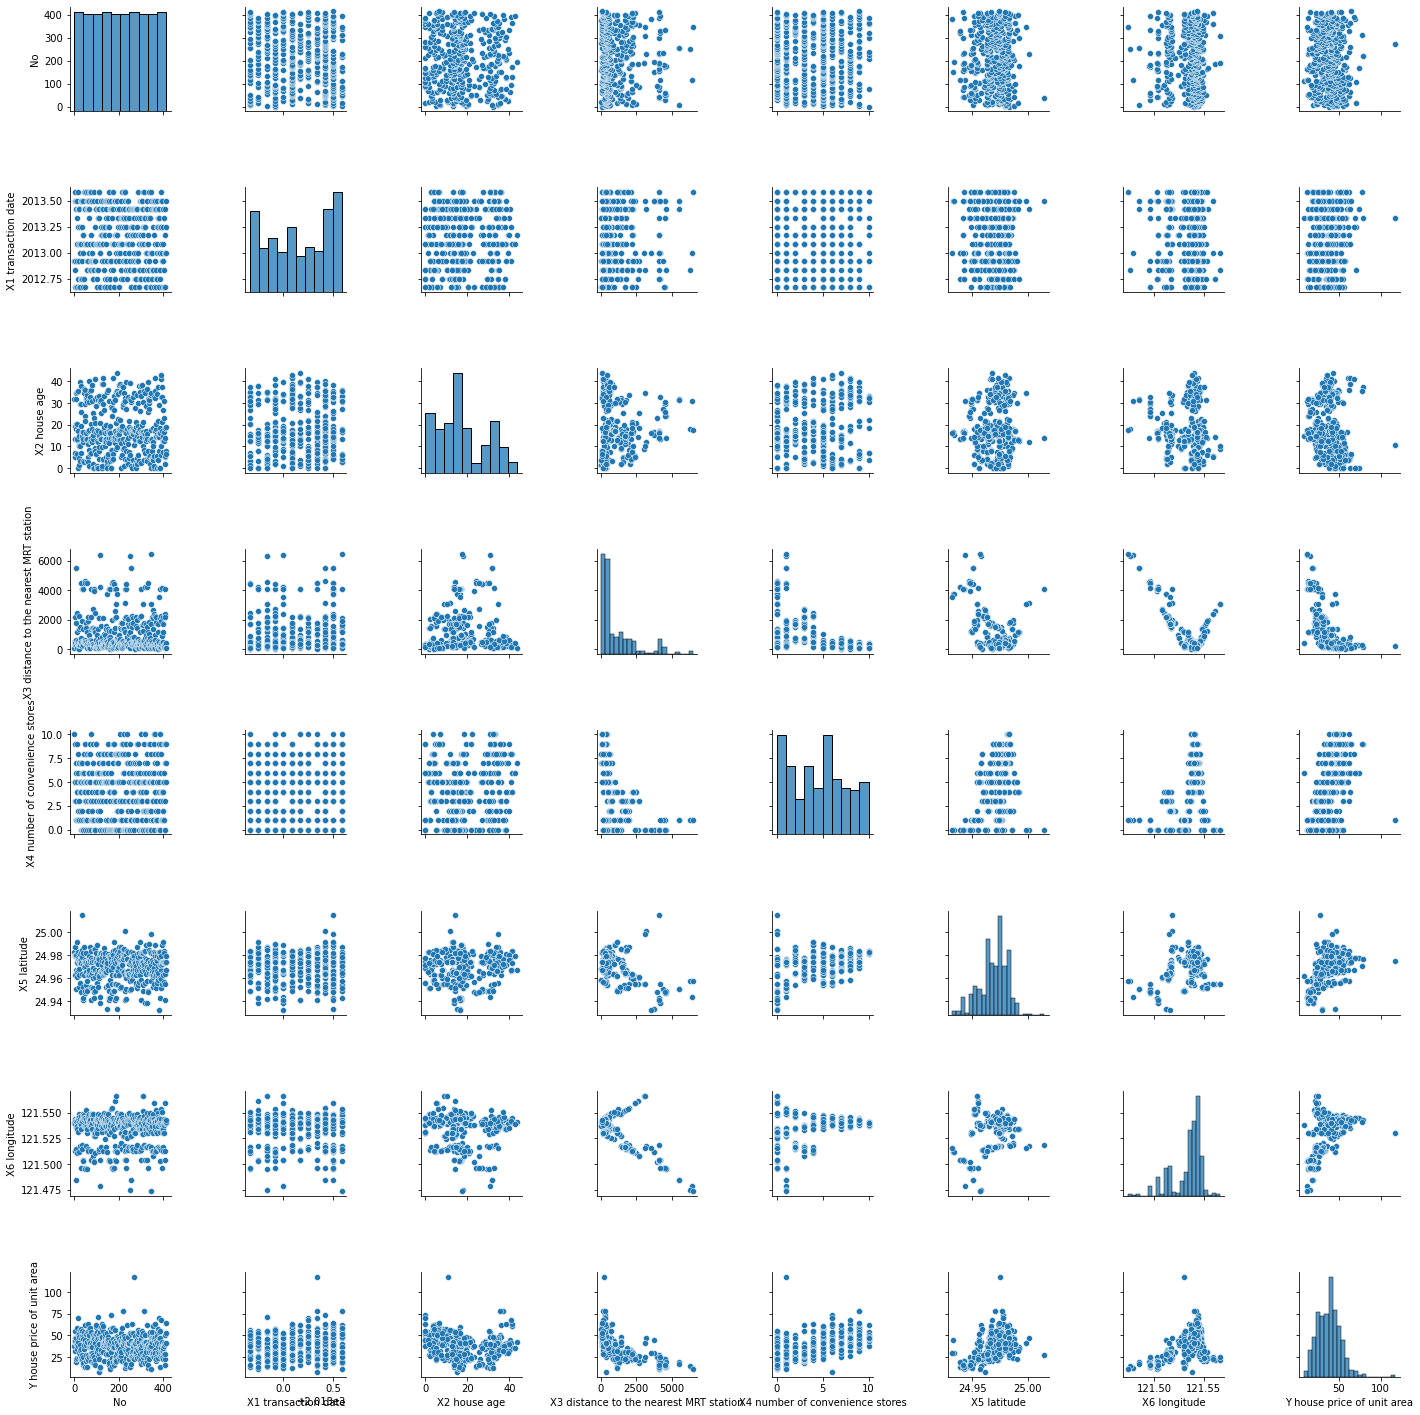

In [10]:
#Visualising all numeric variable
plt.figure(figsize=(6,12))
sns.pairplot(real_estate)
plt.show()

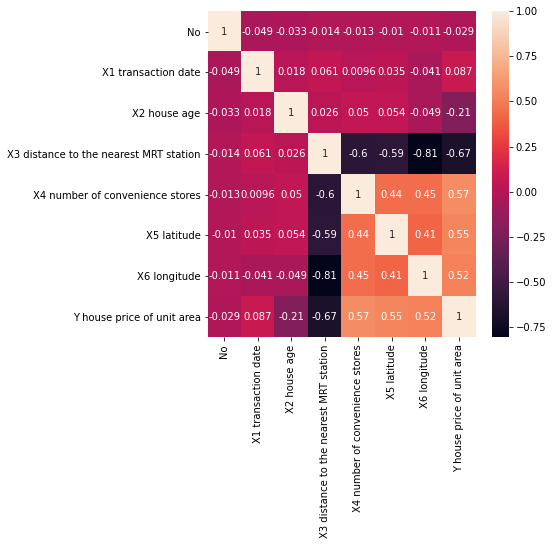

In [11]:
#Find correlation
plt.figure(figsize=(6,6))
sns.heatmap(real_estate.corr(),annot=True)

**Data splitting to Training and Testing model¶**

In [12]:
#import libraries
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(real_estate, train_size=0.70, test_size=0.30,random_state=100)
print(df_train.head())
print(df_test.head())


      No  X1 transaction date  ...  X6 longitude  Y house price of unit area
287  288             2013.000  ...     121.53990                        32.9
31    32             2012.750  ...     121.53408                        25.0
209  210             2012.833  ...     121.54271                        40.9
239  240             2013.500  ...     121.54767                        29.7
47    48             2013.583  ...     121.53715                        61.5

[5 rows x 8 columns]
      No  X1 transaction date  ...  X6 longitude  Y house price of unit area
121  122             2013.500  ...     121.53737                        48.0
353  354             2013.500  ...     121.51284                        31.3
96    97             2013.417  ...     121.54310                        59.5
43    44             2012.750  ...     121.54301                        34.1
125  126             2013.167  ...     121.54089                        48.6

[5 rows x 8 columns]


In [13]:
#Dividing X and y sets for model building
y_train = df_train.pop('Y house price of unit area')
X_train = df_train
print(y_train.head())
print(X_train.head())

287    32.9
31     25.0
209    40.9
239    29.7
47     61.5
Name: Y house price of unit area, dtype: float64
      No  X1 transaction date  ...  X5 latitude  X6 longitude
287  288             2013.000  ...     24.95425     121.53990
31    32             2012.750  ...     24.98281     121.53408
209  210             2012.833  ...     24.97347     121.54271
239  240             2013.500  ...     24.96334     121.54767
47    48             2013.583  ...     24.97563     121.53715

[5 rows x 7 columns]


**Data Modelling and Evaluation¶**

In [14]:
#import Linear regression
from sklearn.linear_model import LinearRegression


In [15]:
#fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.coef_


array([-3.75717207e-03,  6.42486002e+00, -2.89161347e-01, -5.17540700e-03,
        1.05539479e+00,  1.91693471e+02, -5.21359067e+01])

In [17]:
#The coefficient of all independent variable are as follows
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
coeff

,coefficient
No,-0.003757
X1 transaction date,6.424860
X2 house age,-0.289161
X3 distance to the nearest MRT station,-0.005175
X4 number of convenience stores,1.055395
X5 latitude,191.693471
X6 longitude,-52.135907


In [18]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
print(lm_1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.944
Model:                                    OLS   Adj. R-squared (uncentered):              0.943
Method:                         Least Squares   F-statistic:                              682.6
Date:                        Wed, 21 Oct 2020   Prob (F-statistic):                   1.01e-172
Time:                                07:17:15   Log-Likelihood:                         -1060.8
No. Observations:                         289   AIC:                                      2136.
Df Residuals:                             282   BIC:                                      2161.
Df Model:                                   7                                                  
Covariance Type:                    nonrobust                                                  
                                        

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.430410e+08
4,X3 distance to the nearest MRT station,4.620000e+00
7,X6 longitude,3.190000e+00
6,X5 latitude,1.610000e+00
5,X4 number of convenience stores,1.600000e+00
2,X1 transaction date,1.030000e+00
1,No,1.020000e+00
3,X2 house age,1.020000e+00


**Residual Analysis of train data¶**

In [20]:
y_train_price = lm_1.predict(X_train)


In [21]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_price)

0.556247613414836

Text(0.5, 0, 'Error')

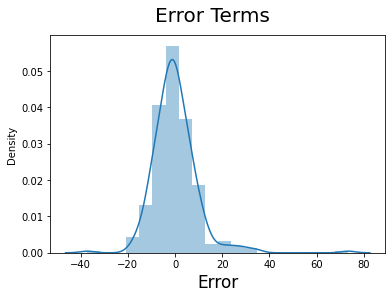

In [22]:
#plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Error',fontsize=17)

# **Making Prediction on Final model¶**

In [23]:
y_test = df_test.pop('Y house price of unit area')
X_test = df_test

In [24]:
y_test_pred = lm_1.predict(X_test)


In [25]:
#import library
from sklearn.metrics import r2_score

In [26]:
#Evaluate r2
r2_score(y_true=y_test,y_pred=y_test_pred)


0.6404225382074542

In [27]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
121,48.0,45.0
353,31.3,38.0
96,59.5,54.0
43,34.1,39.0
125,48.6,49.0


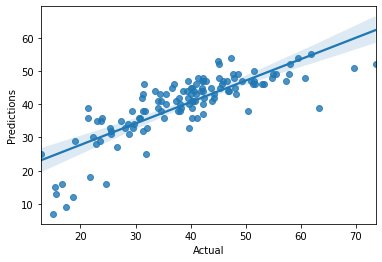

In [28]:
sns.regplot('Actual','Predictions',data=df)


**Evaluating Model performance¶**

In [29]:
from sklearn import metrics

#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,y_test_pred))
#Root mean squared error(RMSE)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


MAE 5.578620085082288
MSE 50.39875537786542
RMSE 7.099208081037308
